In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.io
import os
import sys
import glob
import pandas as pd
from scipy import signal
# サンプリング周波数は300Hz

In [2]:
os.listdir('./physionet.org/files/challenge-2017/1.0.0/training/')

['SHA1SUMS',
 'REFERENCE-v1.csv',
 'MD5SUMS',
 'A03',
 'RECORDS-noisy',
 'SHA256SUMS',
 'RECORDS',
 'A07',
 'REFERENCE.csv',
 'REFERENCE-v3.csv',
 'A04',
 'RECORDS-other',
 'A08',
 'A05',
 'RECORDS-af',
 'A00',
 'RECORDS-normal',
 'REFERENCE-v0.csv',
 'A02',
 'A06',
 'index.html',
 'REFERENCE-v2.csv',
 'A01']

In [3]:
data_path_head = ('./physionet.org/files/challenge-2017/1.0.0/training/')
data_path_a00 = glob.glob(data_path_head + '/A00')
data_path_a00_str = ''.join(data_path_a00)
print(data_path_a00_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00


In [4]:
data_path_a00_001 = glob.glob(data_path_a00_str + '/*001.mat')
data_path_a00_001_str = ''.join(data_path_a00_001)
print(data_path_a00_001_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00/A00001.mat


In [5]:
# MATLABファイルの読み込み
data_a00_001 = scipy.io.loadmat(data_path_a00_001_str)
print(type(data_a00_001))
display(data_a00_001)

<class 'dict'>


{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}

In [6]:
display(data_a00_001.keys())
print('=============')
display(data_a00_001.values())

dict_keys(['val'])

dict_values([array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)])

In [7]:
print(data_path_a00_001_str[-15:])

/A00/A00001.mat


In [8]:
data_a00_001_list = list(data_a00_001.values())
display(data_a00_001_list)
print(type(data_a00_001_list))

[array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)]

<class 'list'>


In [9]:
for index, value in enumerate(np.ravel(data_a00_001_list)):
    print(index)
    print(value)
    if index ==6:
        break
     

0
-127
1
-162
2
-197
3
-229
4
-245
5
-254
6
-261


In [10]:
df_a00_001 = pd.DataFrame(np.ravel(data_a00_001_list))
display(df_a00_001)

,0
0,-127
1,-162
2,-197
3,-229
4,-245
...,...
8995,-12
8996,-15
8997,-18
8998,-22


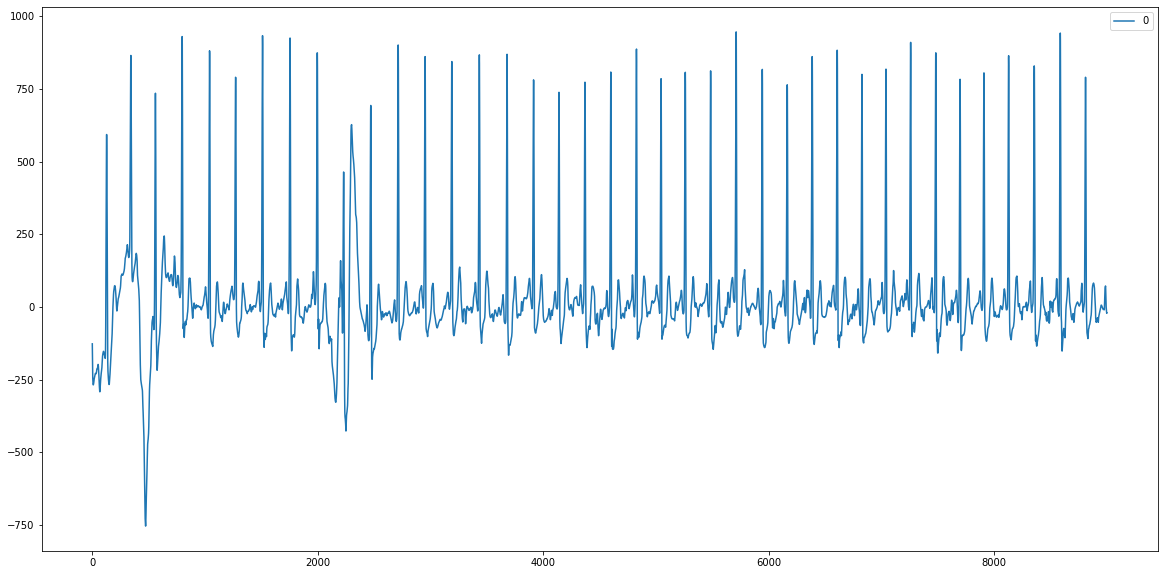

In [11]:
df_a00_001.plot(figsize=(20,10))

In [12]:
df_a00_001.columns = ['a00_001']
df_a00_001['detrend'] = signal.detrend(df_a00_001)

In [13]:
display(df_a00_001)

,a00_001,detrend
0,-127,-4.263256e-14
1,-162,-5.684342e-14
2,-197,-5.684342e-14
3,-229,-1.136868e-13
4,-245,-5.684342e-14
...,...,...
8995,-12,-3.552714e-15
8996,-15,-7.105427e-15
8997,-18,-3.552714e-15
8998,-22,-1.065814e-14


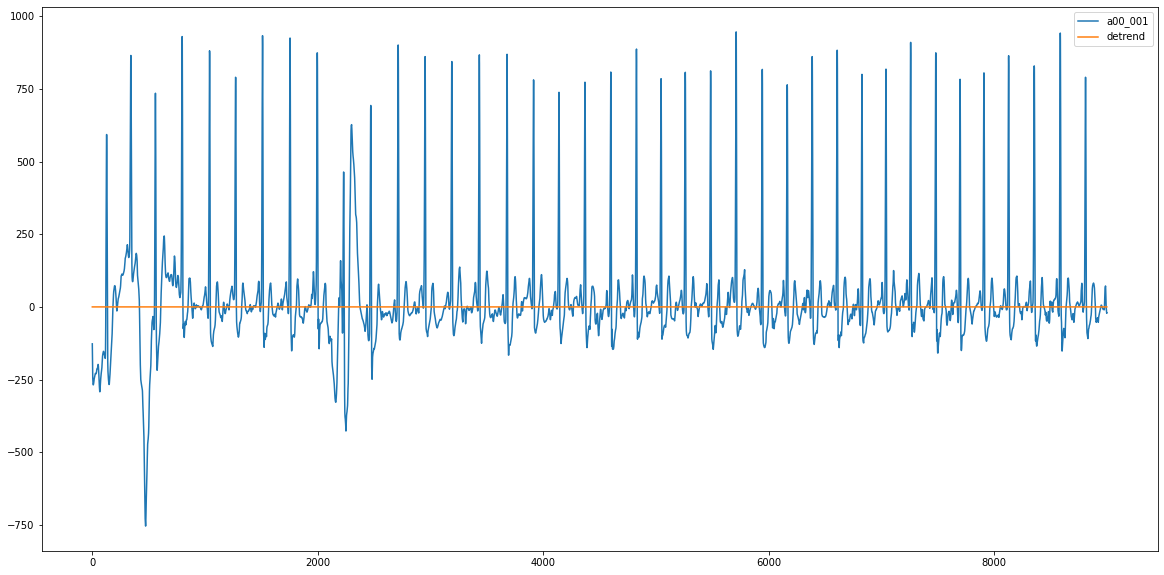

In [14]:
df_a00_001.plot(figsize=(20,10))
plt.legend(loc='best')

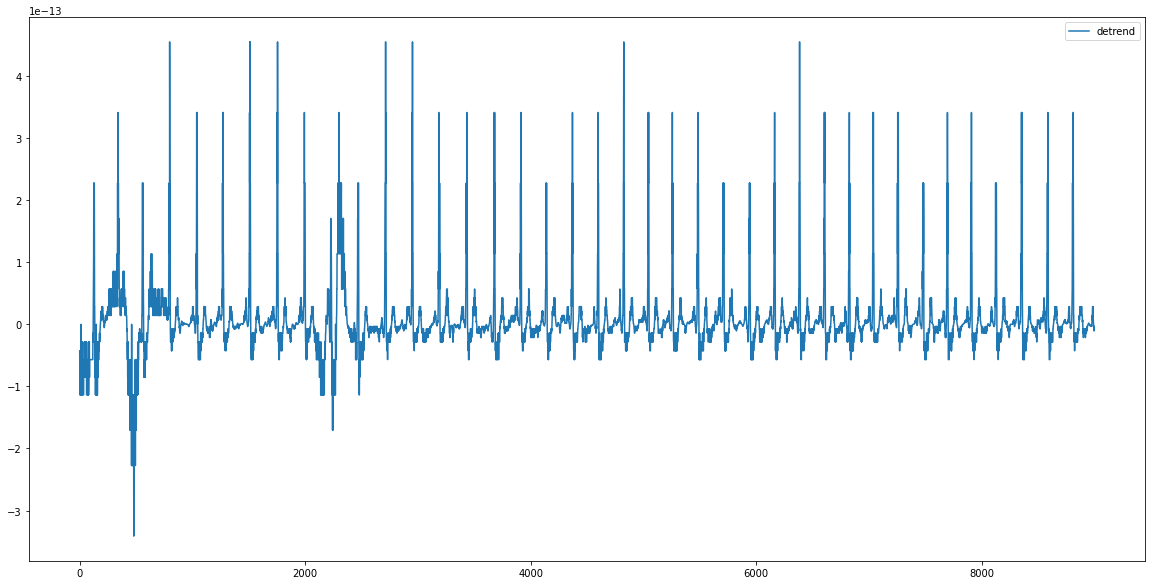

In [15]:
df_a00_001['detrend'].plot(figsize=(20,10))
plt.legend(loc='best')

In [16]:
display(df_a00_001.index)

RangeIndex(start=0, stop=9000, step=1)

In [17]:
df_a00_001_reset_index = df_a00_001.reset_index()
df_a00_001_reset_index = df_a00_001_reset_index.rename(columns={'index': 'time'})
display(df_a00_001_reset_index)

,time,a00_001,detrend
0,0,-127,-4.263256e-14
1,1,-162,-5.684342e-14
2,2,-197,-5.684342e-14
3,3,-229,-1.136868e-13
4,4,-245,-5.684342e-14
...,...,...,...
8995,8995,-12,-3.552714e-15
8996,8996,-15,-7.105427e-15
8997,8997,-18,-3.552714e-15
8998,8998,-22,-1.065814e-14


In [18]:
numtaps = 51 #FIRフイルターの長さ
cutoff = [0.05, 100]
N = len(df_a00_001_reset_index['detrend'])
fs = 300

filter_bandpass = signal.firwin(numtaps=numtaps, cutoff=cutoff,
                                fs=fs, pass_zero=False)
df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
                                                            1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
display(df_a00_001_reset_index)

,time,a00_001,detrend,bandpass_005_100
0,0,-127,-4.263256e-14,-3.647255e-17
1,1,-162,-5.684342e-14,-4.744171e-17
2,2,-197,-5.684342e-14,2.561110e-18
3,3,-229,-1.136868e-13,-8.793235e-17
4,4,-245,-5.684342e-14,-5.523873e-17
...,...,...,...,...
8995,8995,-12,-3.552714e-15,-2.642732e-15
8996,8996,-15,-7.105427e-15,-2.578891e-15
8997,8997,-18,-3.552714e-15,-2.799117e-15
8998,8998,-22,-1.065814e-14,-2.720201e-15


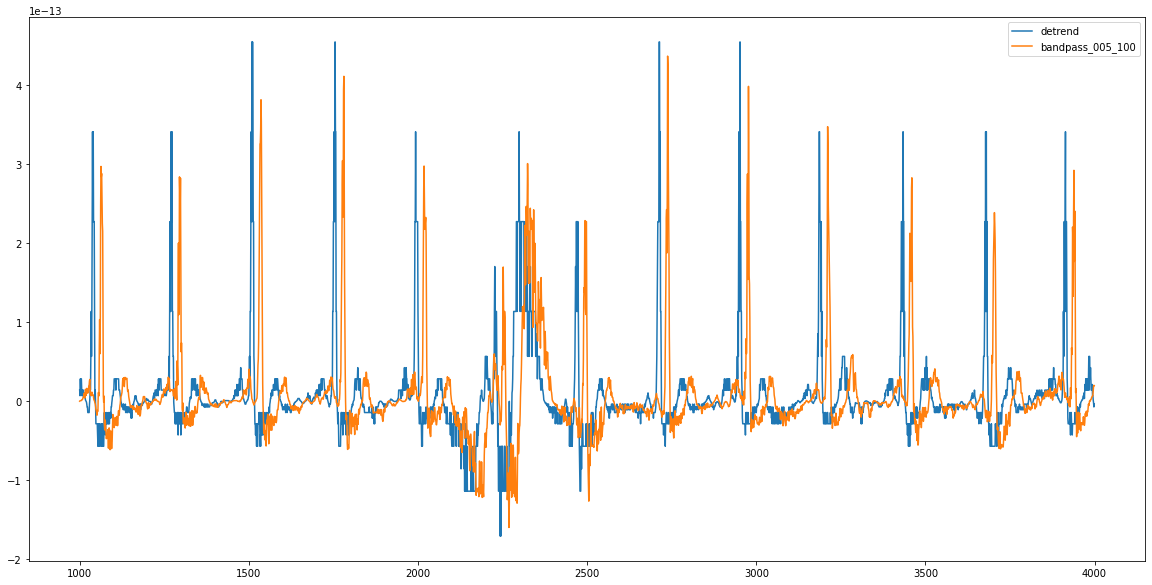

In [19]:

df_a00_001_reset_index.iloc[1000:4000, [2,3]].plot(figsize=(20,10))
plt.legend(loc='best')
plt.xlim=(0,1000)